In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Test

# Print out first 7 data:
df=pd.read_csv("hour.csv")
df.head(7)

http://www.kobakhit.com/beginner/2016/03/06/visualizing-indego-bike-geoson-data-in-python-using-folium.html
    http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Start,End,Duration
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,NaN,NaN,NaN
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,NaN,NaN,NaN
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,NaN,NaN,NaN
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,NaN,NaN,NaN
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,NaN,NaN,NaN
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,NaN,NaN,NaN
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,NaN,NaN,NaN


In [3]:
# Checking the size of the dataset:
print(len(df.columns))
print(len(df.index))

20
17379


In [7]:
# Checking the specific date.
print('temp on a specific date:')
print(df[df['dteday']=='1/1/2011']['temp'])

temp on a specific date:
0     0.24
1     0.22
2     0.22
3     0.24
4     0.24
5     0.24
6     0.22
7     0.20
8     0.24
9     0.32
10    0.38
11    0.36
12    0.42
13    0.46
14    0.46
15    0.44
16    0.42
17    0.44
18    0.42
19    0.42
20    0.40
21    0.40
22    0.40
23    0.46
Name: temp, dtype: float64


In [8]:
np.corrcoef(df[df['dteday']=='1/1/2011']['temp'],df[df['dteday']=='1/1/2011']['cnt'])

array([[ 1.        ,  0.75059529],
       [ 0.75059529,  1.        ]])

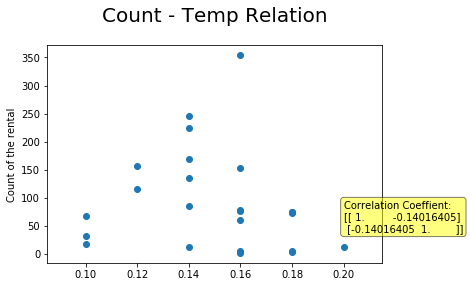

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(df[df['dteday']=='1/3/2012']['temp'],df[df['dteday']=='1/3/2012']['cnt'])
ax1.set_ylabel("Count of the rental")
ax1.set_xlabel("")
ax1.set_title("Count - Temp Relation", y=1.08, x=0.5, fontsize = 20)
ax1.annotate('Correlation Coeffient: \n{}'.format(np.corrcoef(df[df['dteday']=='1/3/2012']['temp'],df[df['dteday']=='1/3/2012']['cnt'])),
                     xy=(0.2,40), bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))

plt.show()

In [40]:
# Checking temperature - counts relation with constant weekday:
weekday = set(df['weekday'])

for day in weekday:
    print("Correlation Coefficient for weekday {} is \n{}". format(day, np.corrcoef(df[df['weekday']==day]['temp'],df[df['weekday']==day]['cnt'])))
    


Correlation Coefficient for weekday 0 is 
[[ 1.          0.50644602]
 [ 0.50644602  1.        ]]
Correlation Coefficient for weekday 1 is 
[[ 1.          0.38250787]
 [ 0.38250787  1.        ]]
Correlation Coefficient for weekday 2 is 
[[ 1.          0.34687779]
 [ 0.34687779  1.        ]]
Correlation Coefficient for weekday 3 is 
[[ 1.          0.36282241]
 [ 0.36282241  1.        ]]
Correlation Coefficient for weekday 4 is 
[[ 1.          0.34538431]
 [ 0.34538431  1.        ]]
Correlation Coefficient for weekday 5 is 
[[ 1.          0.38507846]
 [ 0.38507846  1.        ]]
Correlation Coefficient for weekday 6 is 
[[ 1.          0.51183697]
 [ 0.51183697  1.        ]]


In [44]:
# Checking temperature - counts relation with constant weekday and without holiday factors:
weekday = set(df['weekday'])

for day in weekday:
    if df['holiday'] == 0:
        print("Correlation Coefficient for weekday {} is \n{}". format(day, np.corrcoef(df[df['weekday']==day]['temp'],df[df['weekday']==day]['cnt'])))
    


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1]:
smaller_frame=df[['temp', 'hum', 'cnt']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

NameError: name 'df' is not defined